### <span style="color:rgb(4,139,154)">Machine Learning</span>     AU:2024

### <span style="color:rgb(4,139,154)">3AGI+Neprev</span>


# <span style="color:rgb(4,139,154)">Projet 2 - Modèles de régression </span>

Enseignante: Radhia Bessi                                 

Elèves Ingénieur:  Lekehal Hammada



# <span style="color:rgb(4,139,154)"> Objectif  
Le but de cette session est d'avoir un apercu sur les modèles de régression :   knn, decision tree, random forest, régression linéaire Ridge et Lasso, régression polynomiale. 
 

**Data preprocessing and exploration**

In [1]:
import numpy as np # calcul numérique autour des tableaux et fonctions
import matplotlib.pyplot as plt # visualisation
import pandas as pd # dataframe
pd.options.display.max_columns = None # afficher toutes les colonnes
import seaborn as sns # manipulation et visualisation des stats
import warnings
warnings.filterwarnings('ignore') # ignorer les alertes

In [2]:
#importer le dataset
df =pd.read_csv("C:\\Users\\Youba\\Documents\\Cours ML\\BostonHousing.csv")
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per 10,000 dollars
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
*  LSTAT - lower status of the population
* MEDV - Median value of owner-occupied homes in 1000's dollars


In [5]:
#dimension de dataset
print(df.shape)
#df.dtypes
df.dtypes

(506, 14)


crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object

In [22]:
#noms des varibles (en liste)
cols =df.columns.to_list
print(cols)

<bound method IndexOpsMixin.tolist of Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')>


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [8]:
#description statistique
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [10]:
# count of missing values in each column
missing_values_per_column = df.isnull().sum()
print("Missing values per column:\n", missing_values_per_column)
## total number of missing values in the dataframe
total_missing_values = df.isnull().sum().sum()
print("\nTotal missing values in the dataframe:", total_missing_values)
#deleting rows containing missing values
df_del = df.dropna(axis=0)

Missing values per column:
 crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

Total missing values in the dataframe: 0


In [24]:
#Valeur extrèmes de variables 'rm' et 'b'
new_df=df[['rm','b']]

In [12]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
#scaler= RobustScaler()#
scaler=StandardScaler()#MinMaxScaler()

In [26]:
#new_df standarisé
new_df=scaler.fit_transform(new_df)
#new_df en data frame
new_df=pd.DataFrame(new_df, columns=['rm','b'])
new_df.head()

,rm,b
0,0.413672,0.441052
1,0.194274,0.441052
2,1.282714,0.396427
3,1.016303,0.416163
4,1.228577,0.441052


<Axes: >

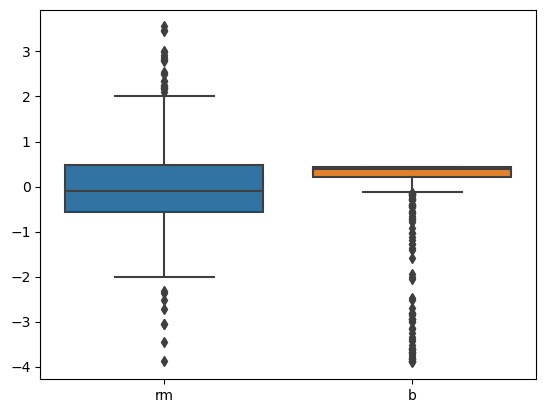

In [27]:
#boxplot 
sns.boxplot(data = new_df,orient='v')

#### Boxplot and outliers
A boxplot based on five key numbers:


* Q1=df.var.quantile(0.25):1st Quartile (25th percentile)
* median (2nd Quartile/ 50th Percentile)
* Q3=df.var.quantile(0.75):3rd Quartile (75th percentile):Q3
* IQR =Q3-Q1: Inter Quartile Range
* minimum=$Q_1–1.5 * IQR$ 
* maximum=$Q_3+1.5*IQR$ 


In [38]:
# Outliers: extreme values within the dataset for va
Q1=new_df.b.quantile(0.25)
Q3=new_df.b.quantile(0.75)
IQR=Q3-Q1
Inf=Q1-1.5*IQR
Sup=Q3+1.5*IQR

len(df.loc[(new_df.b>Sup)])+len(df.loc[(new_df.b<Inf)])

0

In [32]:
# DBSCAN
from sklearn.cluster import DBSCAN

In [39]:
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(new_df)
labels = dbscan.labels_
print(labels)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0 -1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0
  2  0  0  2 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  1  3  0  0 -1  0
  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  1  0  0  0  0  0
  0  0  0  1  0 -1  0  0  0  0  0  1  1  0  0  0  0  0  0  0  0  0 -1  0
  0  0  0  0  0  0  0  0  3 -1  1  0  1  0  0  0  3  3  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0 -1  0  0  0  0  3  0
  0  0  0  3  0  0  0  0  0  1  0  0  0  0  0  0  1  0  1  1  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

Number of outliers: 16


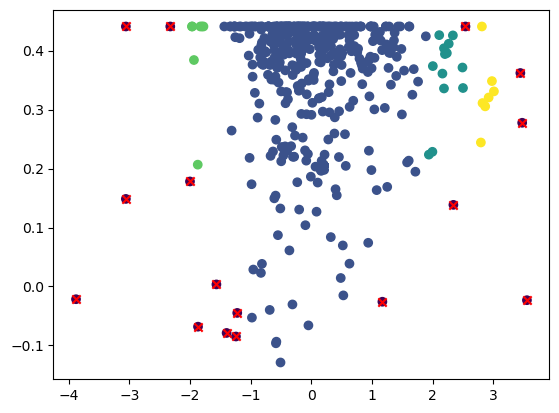

In [40]:
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(new_df)
labels = dbscan.labels_

# Identify the outliers
outliers = np.where(labels ==-1)[0]
X_new=new_df.values
# Print the number of outliers
print("Number of outliers:", len(outliers))

# Plot the data with the outliers highlighted
plt.scatter(X_new[:, 0], X_new[:, 1], c=labels)
plt.scatter(X_new[outliers, 0], X_new[outliers, 1], c="red", marker="x")
plt.show()


In [35]:
new_df.loc[(new_df.b>Sup)]=Q3
new_df.loc[(new_df.b<Inf)]=Q1

In [41]:
df.columns.to_list()

['crim',
 'zn',
 'indus',
 'chas',
 'nox',
 'rm',
 'age',
 'dis',
 'rad',
 'tax',
 'ptratio',
 'b',
 'lstat',
 'medv']

In [42]:
correlations = df.select_dtypes(exclude=['object']).corr(method='pearson')

<Axes: >

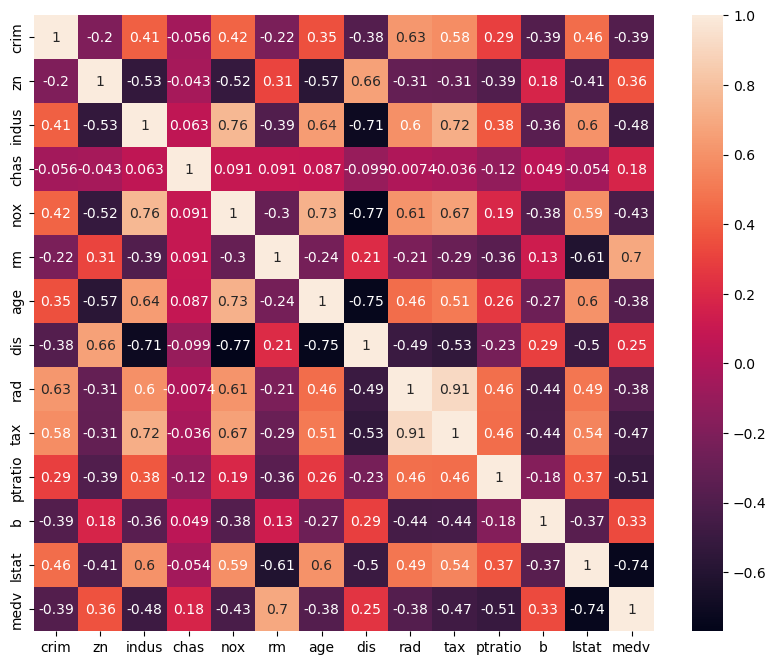

In [43]:
plt.figure(figsize=(10,8))
sns.heatmap(correlations, annot = True)

In [ ]:
##df=pd.get_dummies(df)#, columns=['Var','Var2',...'Varp'])

In [ ]:
#sns.boxplot(data = df, orient = 'h')

# Rappel sur knn, régression polynomiale, decision tree, random forest 

In [44]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [45]:
X =df.drop(columns=['medv'], axis=1)# matrix of features
y =df.medv ## vector of labels 'medv'
X.shape, y.shape

((506, 13), (506,))

In [46]:
feature_names=X.columns.to_list()
print(feature_names)

['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']


In [ ]:
#Convert categorical variable into dummy/indicator variables.
#X = pd.get_dummies(data = X, drop_first =True)
#X.head()

#### Ensembles training et test
Pour évaluer les performances du modèle sur des données invisibles, on divise les données en  training and testing sets. On  entraine  le  modèlele ici avec   80% d'exemples et le test avec   20% du reste. On utilise  'train_test_split function'de scikit-learn library. Choisir 'random_state', pour obtenir le même partage à chaque fois afin de pouvoir reproduire les résultats.
Enfin, on affiche les tailles de training and test sets pour voir si notre division est correcte

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=45)

**Features scaling**
Scaling guarantees that all features are on a comparable scale and have comparable ranges.
* Min-Max Scaling: 
 $x \rightarrow (x-x_{min})/(x_{max}-x_{min})$  : minmax scaler
 
* Standarisation or normalisation  : StandardScaler
$x \rightarrow (x-x_{mean})/std$

* Robust Scaling :RobustScaler
$x \rightarrow (x-Q_{median})/\mbox{IQR}$, $\mbox{IQR}$=Inter-Quartile Range=$Q_2-Q_1$. 
  

In [48]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

### Modèles de régression
* KNeighborsRegressor

Pour entainer et tester le  modèle on utilise 'KNeighborsRegressor' de 
 scikit-learn’ (sklearn)

In [49]:
from sklearn.neighbors import KNeighborsRegressor

In [50]:
knn = KNeighborsRegressor(n_neighbors = 4)
knn.fit(X_train,y_train)
#y_pred_knn = 
#print (score)
print(knn.score(X_train,y_train)) #ensemble training
print(knn.score(X_test,y_test))#ensemle test

0.8602787777734072
0.7770444250965978


In [51]:
y_pred_test_kn =knn.predict(X_test)
for i in range(10):
    print([y_test.values[i],y_pred_test_kn[i]])

[14.4, 17.075]
[33.0, 24.75]
[29.8, 22.125]
[21.2, 21.5]
[46.7, 38.675]
[11.5, 12.875000000000002]
[19.5, 20.125]
[16.0, 18.825]
[25.0, 22.375]
[19.9, 21.1]


In [52]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [53]:
print(f'MAE = { mean_absolute_error(y_test, y_pred_test_kn)}')
print(f'MSE = {mean_squared_error(y_test, y_pred_test_kn)}')
print(f'R2 = {r2_score(y_test, y_pred_test_kn)}')

MAE = 3.3193627450980396
MSE = 24.096587009803915
R2 = 0.7770444250965978


In [59]:
#fonction pour calculer les k plus proches voisins pour une observation x

def predict(k,x):
    # Calculer la distance entre le point x et chaque point d'entraînement
    distances =[np.linalg.norm(np.mean(x-X_train[i])) for i in range(X_train.shape[0])]
     
    # Trouver les k plus proches voisins
    k_indices = np.argsort(distances[:k])
   
    k_nearest_labels =[y_train.values[i] for i in k_indices]
   
    # Retourner la moyenne   parmi les voisins
    y_x=np.mean(k_nearest_labels)

    return y_x

In [60]:
k=3
y_pred=np.zeros_like(y_train)
print(len(y_pred))
for i in range(len(y_train)):
    y_pred[i]= predict(k,X_train[i])

404


In [62]:
# Calculer les métriques associées 
print(f'MAE = { mean_absolute_error(y_train, y_pred)}')
print(f'MSE = {mean_squared_error(y_train, y_pred)}')
print(f'R2 = {r2_score(y_train, y_pred)}')

MAE = 7.277970297029704
MSE = 85.52394114411442
R2 = -0.09170156084000536


##  GridSearchcv
Un hyper-paramètre est externe au processus d’entrainement et il reste statique durant l’entrainement. 
Pour ajuster les différents  hyper-paramètres on peut positionner une liste de possibilités pour chacun des hyper-paramètres et pour chacune des combinaisons  entrainer le modèle puis calculer son score. A la fin  ne garder que le meilleur paramétrage.  GridSearchCV de Scikit-learn permet de faire ceci via k-fold cross validation 

In [63]:


from sklearn.model_selection import GridSearchCV


param_grid=[{'n_neighbors':[1,5,7,9,11,13,15]}]
model=knn
grid_search = GridSearchCV(model, param_grid, cv=5,scoring='r2')# score R2 ici#'neg_mean_squared_error')
grid_search.fit(X_train, y_train)


#help(model)

# Afficher le meilleur score R² obtenu
print(f"Best R² score: {grid_search.best_score_}")

# Afficher les meilleurs hyperparamètres
print(f"Best parameters: {grid_search.best_params_}")

Best R² score: 0.7294406535727183
Best parameters: {'n_neighbors': 5}


**DecisionTreeRegressor**

In [64]:
from IPython.display import Image

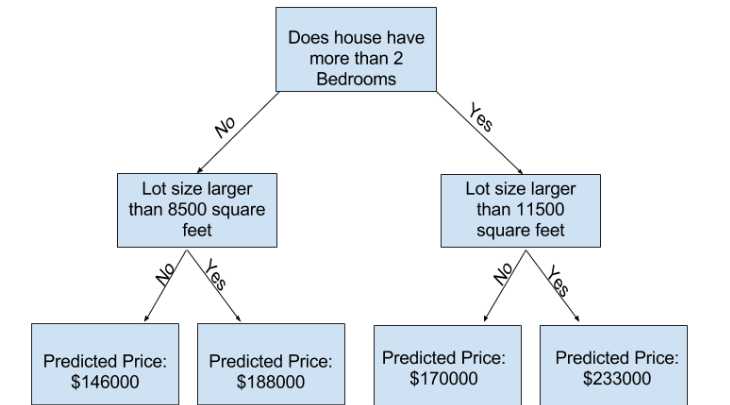

In [4]:
#Image('DT_Reg.PNG')#'DT_Reg2.PNG')

In [71]:


from sklearn.tree import DecisionTreeRegressor


# Créer le modèle d'arbre de décision
model = DecisionTreeRegressor()

# Définir une grille d'hyperparamètres
param_grid = {
    'max_depth': [2, 3, 4, 5]
    #'min_samples_split': [2, 5, 10]
}

# Créer un objet GridSearchCV en utilisant le score R²
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           scoring='r2', cv=10)  # 5-fold cross-validation

# Entraîner le GridSearchCV
grid_search.fit(X_train, y_train)

# Afficher le meilleur score R² obtenu
print(f"Best R² score: {grid_search.best_score_}")

# Afficher les meilleurs hyperparamètres
print(f"Best parameters: {grid_search.best_params_}")

# Si vous voulez obtenir le score R² sur les données d'entraînement
best_model = grid_search.best_estimator_
train_score = best_model.score(X_train, y_train)
print(f"Train score (R²): {train_score}")

Best R² score: 0.7507846393308644
Best parameters: {'max_depth': 4}
Train score (R²): 0.9004424441379788


In [72]:
dt = DecisionTreeRegressor()#(max_depth=5)
dt.fit(X_train,y_train)
dt.score(X_train,y_train)
dt.score(X_test,y_test)
#help(model)

0.8419088024228879

In [ ]:
#dt.feature_importances_

In [73]:
 y_pred_train_dt=dt.predict(X_train)
print(f'R2 = {r2_score(y_train,y_pred_train_dt)}')

R2 = 1.0


In [74]:
 y_pred_test_dt=dt.predict(X_test)

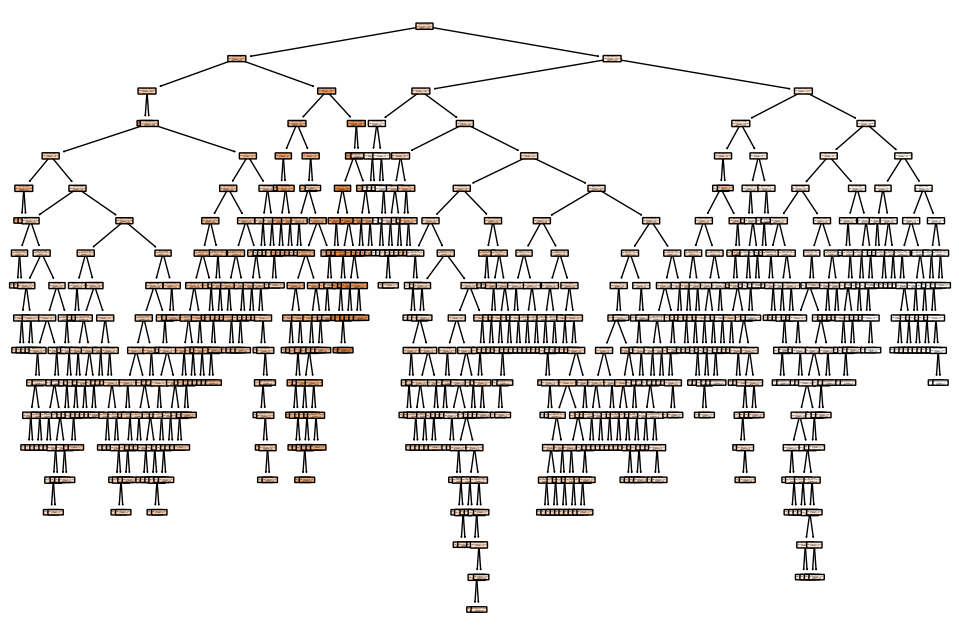

In [97]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8))
plot_tree(dt,filled= True, feature_names=feature_names, rounded=True)
plt.show()

In [75]:
print(f'MAE = { mean_absolute_error(y_test, y_pred_test_dt)}')
print(f'MSE = {mean_squared_error(y_test, y_pred_test_dt)}')
print(f'R2 = {r2_score(y_test, y_pred_test_dt)}')

MAE = 3.016666666666667
MSE = 17.086176470588235
R2 = 0.8419088024228879


### Random forest 

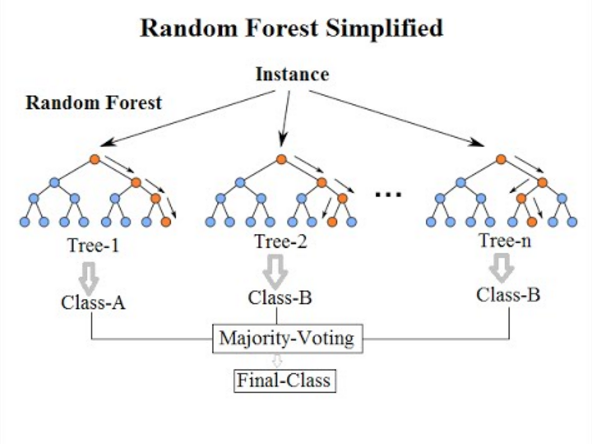

In [5]:
#Image('random_forest.png')

In [83]:
from sklearn.ensemble import RandomForestRegressor

# Créer le modèle RandomForest
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
#print (score)
print(rf.score(X_train,y_train)) #ensemble training
print(rf.score(X_test,y_test))#ensemle test

0.9817275311838368
0.9076995924071758


In [84]:
#faire le nécessaire pour rf
y_pred_test_RF =rf.predict(X_test)
for i in range(10):
    print([y_test.values[i],y_pred_test_RF[i]])

[14.4, 18.761999999999997]
[33.0, 32.707]
[29.8, 24.316999999999997]
[21.2, 21.641]
[46.7, 42.06100000000002]
[11.5, 12.699999999999989]
[19.5, 20.867000000000008]
[16.0, 19.220000000000006]
[25.0, 30.98899999999999]
[19.9, 20.819999999999997]


In [85]:
print(f'MAE = { mean_absolute_error(y_test, y_pred_test_RF)}')
print(f'MSE = {mean_squared_error(y_test, y_pred_test_RF)}')
print(f'R2 = {r2_score(y_test, y_pred_test_RF)}')

MAE = 2.405911764705882
MSE = 9.975641127450977
R2 = 0.9076995924071758


##  Features selection for regression data set 
L'importance des variables dans un arbre de décision est mesurée par la réduction de l'impureté (variance pour la régression, Gini ou entropie pour la classification) pondérée par la taille des nœuds.

In [81]:
help( RandomForestRegressor.feature_importances_)

Help on property:

    The impurity-based feature importances.
    
    The higher, the more important the feature.
    The importance of a feature is computed as the (normalized)
    total reduction of the criterion brought by that feature.  It is also
    known as the Gini importance.
    
    high cardinality features (many unique values). See
    :func:`sklearn.inspection.permutation_importance` as an alternative.
    
    Returns
    -------
    feature_importances_ : ndarray of shape (n_features,)
        The values of this array sum to 1, unless all trees are single node
        trees consisting of only the root node, in which case it will be an
        array of zeros.



In [86]:
# Feature importance
importances = rf.feature_importances_
print(importances)

[0.03579659 0.00097903 0.0053437  0.00114785 0.03114414 0.29548017
 0.01346542 0.06253582 0.00915177 0.0181077  0.01716792 0.01299173
 0.49668816]


In [87]:
feature_names=df.columns.to_list()

In [88]:
L_rf = np.argsort(importances)
#print(L_rf)
features_arr =[feature_names[i] for i in L_rf]# np.asarray(feature_names[L_rf])

Text(0.5, 0, 'Importance scores')

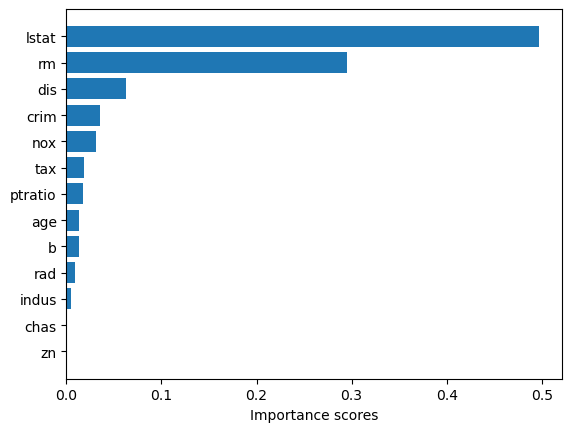

In [89]:
padding = np.arange(len(L_rf))
plt.barh(padding, importances[L_rf],align = 'center')
plt.yticks(padding,features_arr)
plt.xlabel('Importance scores')

## ** Régression linéaire **

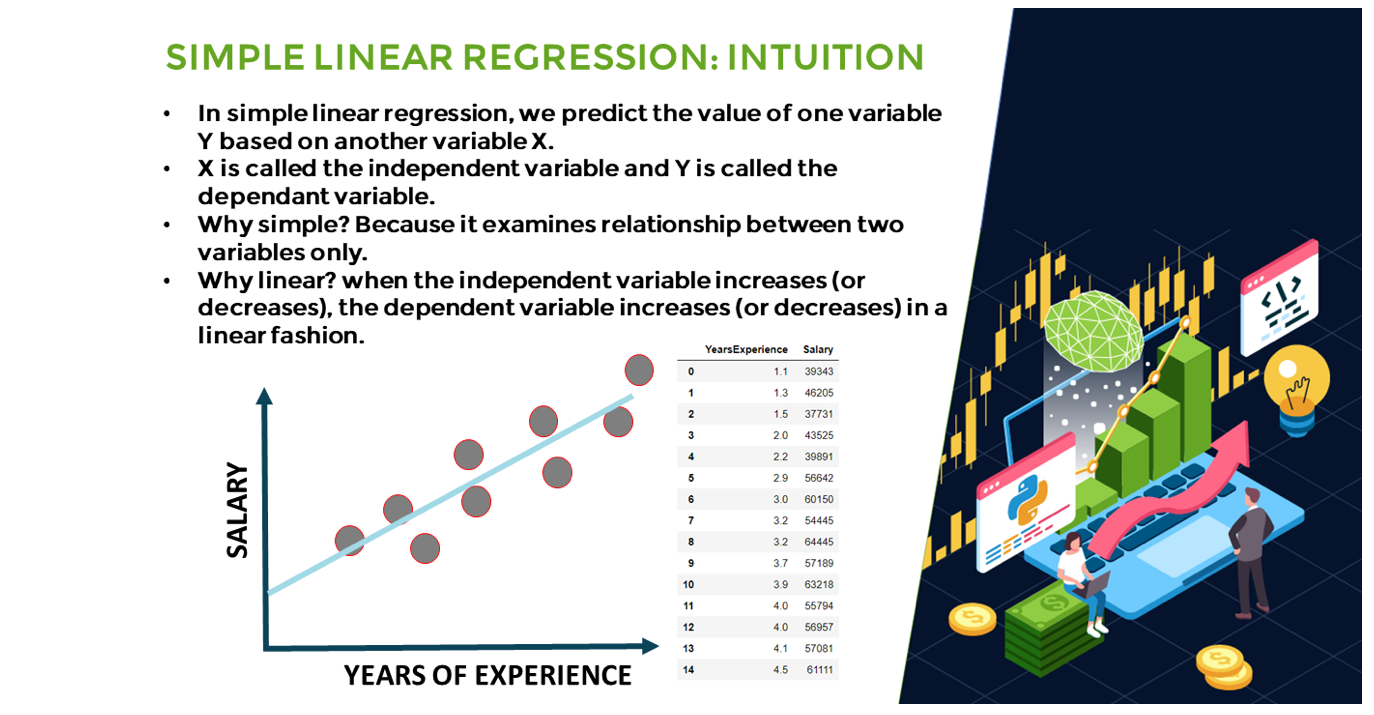

In [6]:
#from IPython.display import Image
#Image('regression1.png')
#Voisinage Tabulaire

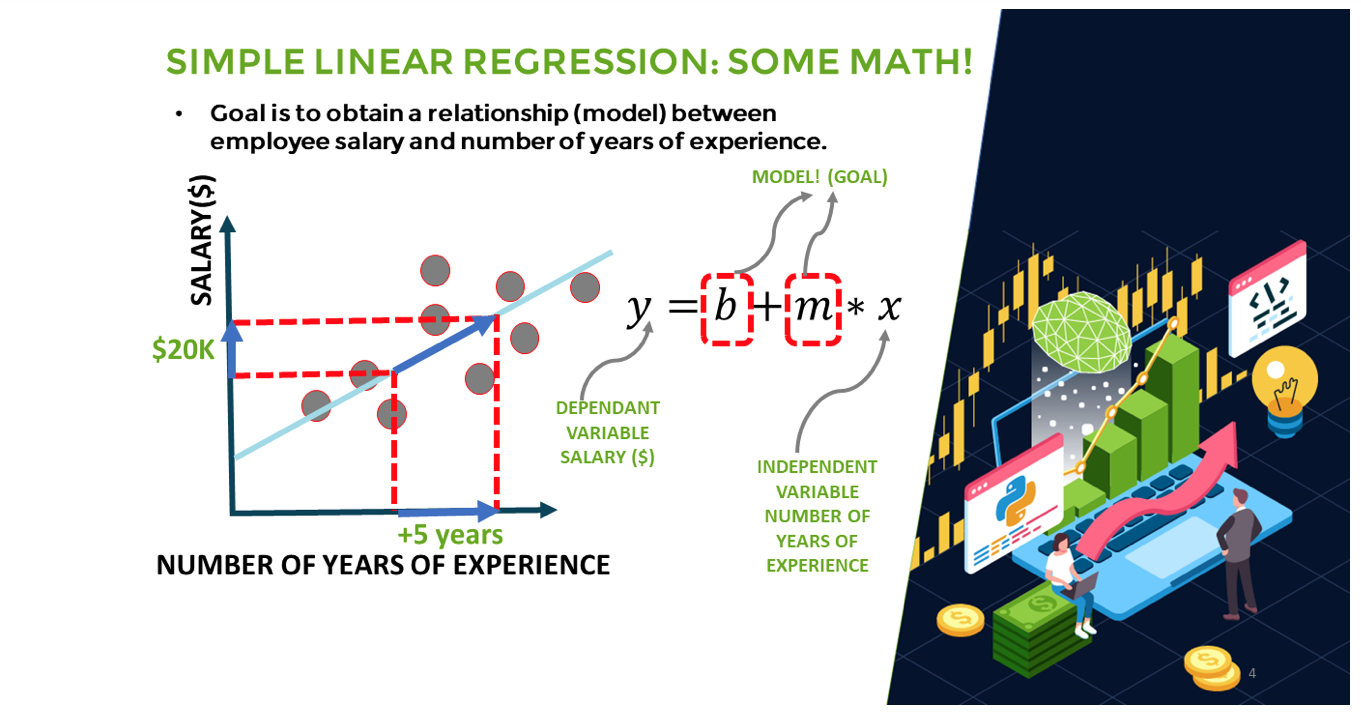

In [7]:
#Image('regression2.png')

In [91]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()

In [92]:
LR.fit(X_train,y_train)
print(LR.score(X_train,y_train)) #ensemble training
print(LR.score(X_test,y_test))#ensemle test

0.7387038327766107
0.7413935597999848


In [93]:
y_pred_r=LR.predict(X_test)
for i in range(10):
    print([y_test.values[i],y_pred_r[i]])

[14.4, 9.127484276994185]
[33.0, 23.22607404507643]
[29.8, 25.43491756572729]
[21.2, 21.939121060581066]
[46.7, 35.036968498264095]
[11.5, 14.443125770819522]
[19.5, 19.79591820626032]
[16.0, 18.77273278281266]
[25.0, 28.441562105736608]
[19.9, 17.68287017792184]


In [94]:
print(f'MAE = { mean_absolute_error(y_test, y_pred_r)}')
print(f'MSE = {mean_squared_error(y_test, y_pred_r)}')
print(f'R2 = {r2_score(y_test, y_pred_r)}')

MAE = 3.887207585260935
MSE = 27.94966033154899
R2 = 0.7413935597999848


** Regularisation **

### Régression Ridge

In [98]:
from sklearn.linear_model import Ridge
ridge =Ridge(alpha=0.1)   
ridge.fit(X_train,y_train)

print(ridge.score(X_train,y_train)) #ensemble training
print(ridge.score(X_test,y_test))#ensemle test    #score
ridge.score(X_test,y_test)
y_ridge =Ridge. #prediction sur l'ensemble train
y_ridget =? #

0.7387036308784384
0.7413909111143052


TypeError: LinearModel.predict() missing 1 required positional argument: 'X'

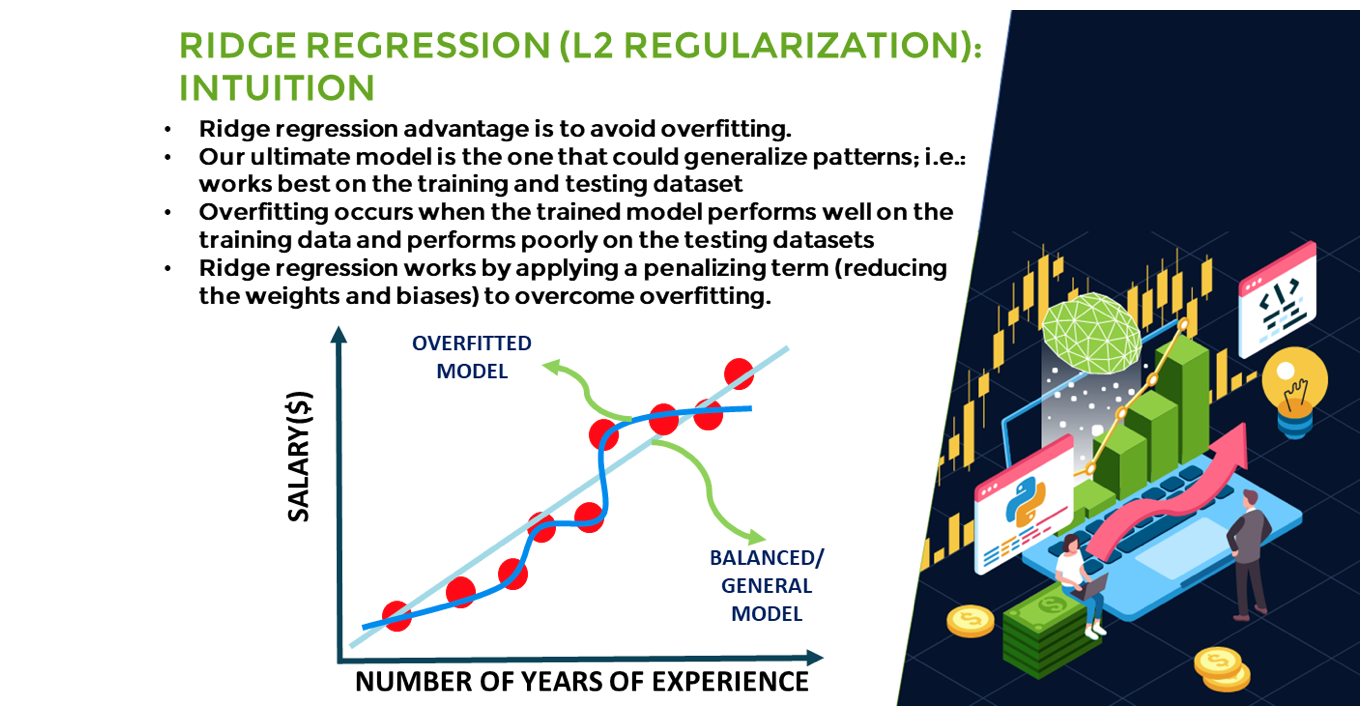

In [8]:
#Image('regularization2.png')

In [ ]:
print(ridge.intercept_)
#print(ridge.coef_)

In [ ]:
#metrique sur ensemble test et training
????? # a completer

In [ ]:
w_r=ridge.coef_
#w_r

In [ ]:
#nuage de points de w_R et w_r
plt.scatter(range(len(w_r)),np.abs(w_r))

In [ ]:
#tri de 20 1ere variables par importance par w_r

coefr = pd.Series(np.abs(w_r), feature_names ).sort_values(ascending=False)
coefr.plot(kind='barh', title='Ridge Coefficients')
L_r=set(coefr.index)

In [ ]:
len(w_r)
len(feature_names)

In [ ]:
len(L_R.intersection(L_r))

### Régression Lasso

In [ ]:
from sklearn.linear_model import Lasso
lasso =? 
?
y_lasso = ?

In [ ]:
## métriques sur ensemble train et test
???

In [ ]:
w_L=? #vecteur poids
print(w_L)

In [ ]:
#nuage de points de w_R et w_r
plt.scatter(range(len(w_r)),np.abs(w_r))
#nuage de points de w_R et w_r
plt.scatter(range(len(w_L)),np.abs(w_L))

In [ ]:
# Valeur par importance
coefL =?
coefL.plot(kind=?, title='Lasso Coefficients')
L_L=set(coefL.index)#[1:k])


In [ ]:
#gridsearch pour valeur de alpha dans [0.1, 0.5, 1, 10]

## 


In [ ]:
results = grid_search.cv_results_
for mean_score, params in zip(results['mean_test_score'], results['params']):
    print(np.sqrt(mean_score), params)

# Régression polynomiale
La régression polynomiale est une forme d' analyse de régression dans laquelle la relation entre la variable explicative et la variable expliquée est modélisée comme un polynôme.

Pour appliquer les transformations polynomiales aux 'features' on utilise 'PolynomialFeatures' de 
 sklearn’

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(X_train)

model = LinearRegression()
model.fit(?, ?)
y_poly_pred = ?

rmse = np.sqrt(mean_squared_error(y_train,y_poly_pred))
#r2 = r2_score(y,y_poly_pred)
print(rmse)
X_test_poly = polynomial_features.fit_transform(X_test)
y_test_predict = model.predict(X_test_poly)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))


print('La performance du modèle sur la base de test')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))

In [ ]:
# fin 
# Bessi Radhia : Septembre 2024